In [3]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Read the input file and check the data dimension

In [5]:
df=pd.read_csv("german_credit.csv")

In [6]:
df.shape

(1000, 21)

In [7]:
df.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [8]:
df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [9]:
df.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

In [10]:
#Getting the count of classes in each categorical column
for column in df.select_dtypes(include="object").columns:
    print("Unique Values Count for column",column,":",df[column].nunique())
    print("\n")
    print(df[column].value_counts())
    print("\n")
    

Unique Values Count for column account_check_status : 4


no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: account_check_status, dtype: int64


Unique Values Count for column credit_history : 5


existing credits paid back duly till now                       530
critical account/ other credits existing (not at this bank)    293
delay in paying off in the past                                 88
all credits at this bank paid back duly                         49
no credits taken/ all credits paid back duly                    40
Name: credit_history, dtype: int64


Unique Values Count for column purpose : 10


domestic appliances             280
car (new)                       234
radio/television                181
car (used)                      103
business                         97
(vacation - does 

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [11]:
# Lets build a Ensemble model but need to modify the dataset first
X_data=df.drop(["default"],axis=1)
y_data=df["default"]
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.50)

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

###### Cannot use get_dummies as it will result in high dimensionality, highly sparsed decision trees


###### and loosing the importance of categorical variable while tree split

###### Techniques implied to convert categorical to numerical:
    Using Frequency to combine less frequency classes into one
    Using Label Encoder
    Using lower bound and upper bound for bins

In [12]:
labelEncoder=LabelEncoder()

In [13]:
df["telephone_encoded"]=labelEncoder.fit_transform(df["telephone"])

df["job_level_combined"]=df["job"]
df.job_level_combined.replace("unemployed/ unskilled - non-resident","unskilled - resident",inplace=True)
df["job_encoded"]=labelEncoder.fit_transform(df["job_level_combined"])

df["foreign_worker_encoded"]=labelEncoder.fit_transform(df["foreign_worker"])


df["housing_combined"]=df["housing"]
df.housing_combined.replace("for free","rent",inplace=True)
df["housing_encoded"]=labelEncoder.fit_transform(df["housing_combined"])

df["other_installment_plans_combined"]=df["other_installment_plans"]
df.other_installment_plans_combined.replace("stores","bank",inplace=True)
df["other_installment_plans_encoded"]=labelEncoder.fit_transform(df["other_installment_plans_combined"])

df["property_encoded"]=labelEncoder.fit_transform(df["property"])

df["credit_history_combined"]=df["credit_history"]
df.credit_history_combined.replace("no credits taken/ all credits paid back duly",
                                   "all credits at this bank paid back duly",inplace=True)
df["credit_history_encoded"]=labelEncoder.fit_transform(df["credit_history_combined"])

df["purpose_combined"]=df["purpose"]
df.purpose_combined.replace("furniture/equipment","education",inplace=True)
df.purpose_combined.replace("repairs","education",inplace=True)
df.purpose_combined.replace("retraining","education",inplace=True)
df["purpose_encoded"]=labelEncoder.fit_transform(df["purpose_combined"])

df["other_debtors_combined"]=df["other_debtors"]
df.other_debtors_combined.replace("co-applicant","guarantor",inplace=True)
df["other_debtors_encoded"]=labelEncoder.fit_transform(df["other_debtors_combined"])

df["personal_status_sex_combined"]=df["personal_status_sex"]
df.personal_status_sex_combined.replace("male : divorced/separated","male : married/widowed",inplace=True)
df["personal_status_sex_encoded"]=labelEncoder.fit_transform(df["personal_status_sex_combined"])

df["savings_encoded"]=labelEncoder.fit_transform(df["savings"])

df["account_check_status_encoded"]=labelEncoder.fit_transform(df["account_check_status"])

df["present_emp_since_cleaning"]=df["present_emp_since"]
df["present_emp_since_cleaning"].replace(".. >= 7 years","7-7",inplace=True)
df["present_emp_since_cleaning"].replace("1 <= ... < 4 years","1-4",inplace=True)
df["present_emp_since_cleaning"].replace("4 <= ... < 7 years","4-7",inplace=True)
df["present_emp_since_cleaning"].replace("... < 1 year ","0-1",inplace=True)
df["present_emp_since_cleaning"].replace("unemployed","0-0",inplace=True)
df["present_emp_since_cleaning"]
df["experience_lower_bin"],df["experience_upper_bin"]=zip(*df['present_emp_since_cleaning'].map(lambda x: x.split('-')))


### Check for highly correlated variables but don't required any treatment for this use case

###### Doing after dropping the unnecessary columns


###### Step done after next step. Please check one step later

### Drop the original variables which are converted to dummy

In [14]:
df.drop(["telephone_encoded",
         "telephone",
         "job_level_combined",
         "job",
         "foreign_worker",
         "housing_combined",
         "housing",
         "other_installment_plans_combined",
         "other_installment_plans","property",
         "credit_history_combined",
         "credit_history",
         "purpose_combined",
         "purpose",
         "other_debtors_combined",
         "other_debtors",
         "personal_status_sex_combined",
         "personal_status_sex",
         "savings",
         "account_check_status",
         "present_emp_since_cleaning",
         "present_emp_since"],axis=1,inplace=True)

In [15]:
df.columns

Index(['default', 'duration_in_month', 'credit_amount',
       'installment_as_income_perc', 'present_res_since', 'age',
       'credits_this_bank', 'people_under_maintenance', 'job_encoded',
       'foreign_worker_encoded', 'housing_encoded',
       'other_installment_plans_encoded', 'property_encoded',
       'credit_history_encoded', 'purpose_encoded', 'other_debtors_encoded',
       'personal_status_sex_encoded', 'savings_encoded',
       'account_check_status_encoded', 'experience_lower_bin',
       'experience_upper_bin'],
      dtype='object')

In [16]:
df["experience_lower_bin"]=df["experience_lower_bin"].astype("int")
df["experience_upper_bin"]=df["experience_upper_bin"].astype("int")


In [17]:
df.dtypes

default                            int64
duration_in_month                  int64
credit_amount                      int64
installment_as_income_perc         int64
present_res_since                  int64
age                                int64
credits_this_bank                  int64
people_under_maintenance           int64
job_encoded                        int32
foreign_worker_encoded             int32
housing_encoded                    int32
other_installment_plans_encoded    int32
property_encoded                   int32
credit_history_encoded             int32
purpose_encoded                    int32
other_debtors_encoded              int32
personal_status_sex_encoded        int32
savings_encoded                    int32
account_check_status_encoded       int32
experience_lower_bin               int32
experience_upper_bin               int32
dtype: object

In [18]:
df.shape

(1000, 21)

In [19]:
#Checking Correlation Matrix
df.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,job_encoded,foreign_worker_encoded,...,other_installment_plans_encoded,property_encoded,credit_history_encoded,purpose_encoded,other_debtors_encoded,personal_status_sex_encoded,savings_encoded,account_check_status_encoded,experience_lower_bin,experience_upper_bin
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,-0.036866,0.082079,...,-0.113285,0.034011,-0.009460,-0.071555,-0.000751,-0.083856,-0.129332,-0.302406,-0.105589,-0.130684
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,-0.217511,0.138196,...,-0.067602,0.068363,-0.056496,-0.086139,0.009993,0.109837,0.072265,-0.096005,0.057434,0.073848
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,-0.302002,0.050050,...,-0.048292,0.081618,-0.077917,-0.085930,-0.004116,0.133059,0.087976,-0.092638,0.012550,0.009619
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.084435,0.090024,...,-0.016139,0.025613,-0.019308,0.007438,0.013823,0.110321,-0.001663,0.029780,0.134467,0.104860
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.005300,0.054097,...,0.016704,0.107311,-0.085994,-0.022215,0.020553,0.028242,0.093577,0.008835,0.292062,0.206418
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.031525,0.006151,...,-0.035362,0.166124,-0.138085,-0.129496,0.030822,0.198864,0.061369,0.083636,0.326622,0.205770
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,0.014005,0.009717,...,-0.050290,-0.001222,-0.461691,-0.082459,0.022966,0.114413,-0.047965,0.084513,0.144036,0.121570
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,0.103111,-0.077071,...,-0.072220,0.067663,-0.076826,-0.116644,-0.005566,0.262708,0.028827,0.030417,0.095999,0.091470
job_encoded,-0.036866,-0.217511,-0.302002,-0.084435,-0.005300,-0.031525,0.014005,0.103111,1.000000,-0.098819,...,0.003252,-0.022326,-0.003614,-0.000255,-0.046296,-0.067740,-0.024232,-0.019922,-0.099217,-0.041028
foreign_worker_encoded,0.082079,0.138196,0.050050,0.090024,0.054097,0.006151,0.009717,-0.077071,-0.098819,1.000000,...,-0.025623,0.006595,0.010667,0.027598,0.119641,-0.042574,0.012946,-0.014658,0.047555,0.021698


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [20]:
X_data=df.drop(["default"],axis=1)
y_data=df["default"]
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.30)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [21]:
randomForest=RandomForestClassifier(n_estimators=500,n_jobs=2,criterion="entropy",random_state=9999)

In [22]:
model=randomForest.fit(X_train,y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [23]:
#Print the Accuracy Score
y_pred=model.predict(X_test)
accuracyScore=accuracy_score(y_pred,y_test)
print("Accuracy Score is:",accuracyScore)

Accuracy Score is: 0.8


In [24]:
#Print the Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[204,   8],
       [ 52,  36]], dtype=int64)

### Q6 Show the list of the features importance( 1 Marks)

In [25]:
feats = {} 
for feature, importance in zip(df.columns, model.feature_importances_):
    feats[feature] = importance 
feats

{'default': 0.10750488682522505,
 'duration_in_month': 0.14757208690094556,
 'credit_amount': 0.04430745671301228,
 'installment_as_income_perc': 0.04323961488177765,
 'present_res_since': 0.10602367196869525,
 'age': 0.02315030778177544,
 'credits_this_bank': 0.0157836177662193,
 'people_under_maintenance': 0.032858611958802485,
 'job_encoded': 0.0063704203093232865,
 'foreign_worker_encoded': 0.020656106044217117,
 'housing_encoded': 0.019501223664696254,
 'other_installment_plans_encoded': 0.04565115606825067,
 'property_encoded': 0.04900175862052104,
 'credit_history_encoded': 0.0648777581762662,
 'purpose_encoded': 0.015335120864461172,
 'other_debtors_encoded': 0.03254995601795504,
 'personal_status_sex_encoded': 0.045314605420380155,
 'savings_encoded': 0.10471426273826451,
 'account_check_status_encoded': 0.04018303317471795,
 'experience_lower_bin': 0.03540434410449369}

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


In [27]:
# Use below values
num_folds = 10
seed = 77
scores=[]

In [28]:
#Validate the Random Forest model build above using k fold

In [29]:
kf=KFold(n_splits=10,random_state=43)

In [30]:
X=df.drop(["default"],axis=1)
y=df["default"]


In [31]:
for train_index,test_index in kf.split(df):
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    model=randomForest.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    scores.append(accuracy_score(y_predict,y_test))

In [32]:
#Calculate Mean score

In [33]:
print("Score for each run in K-Fold for 10 folds are:\n")
print(scores)

Score for each run in K-Fold for 10 folds are:

[0.84, 0.68, 0.77, 0.78, 0.79, 0.7, 0.75, 0.79, 0.74, 0.77]


In [34]:
mean_score=np.mean(scores)
print("Mean Score is:",mean_score)

Mean Score is: 0.7610000000000001


In [35]:
# Calculate score standard deviation using std()

In [36]:
std_dev=np.std(scores)
print("Standard Deviation is:",std_dev)

Standard Deviation is: 0.043920382511995495


# Q8 Print the confusion matrix( 1 Marks)

In [37]:
y_pred = cross_val_predict(randomForest, X, y, cv=kf)
conf_mat = confusion_matrix(y, y_pred)
print("Confusion Matrix is:\n",conf_mat)


Confusion Matrix is:
 [[638  62]
 [177 123]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [38]:
from sklearn.metrics import precision_score,recall_score

In [39]:
precision=precision_score(y,y_pred)
print("Precision is:",precision)

Precision is: 0.6648648648648648


In [40]:
recall=recall_score(y,y_pred)
print("Recall is:",recall)

Recall is: 0.41


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [41]:
#Hint: Use roc_curve

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [43]:
fpr,tpr,thresholds=roc_curve(y,y_pred)

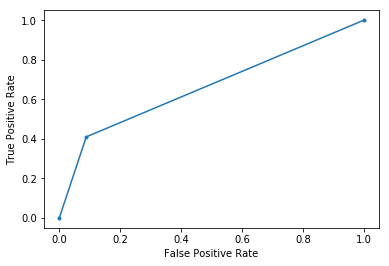

In [44]:
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.plot(fpr, tpr, marker='.')

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [52]:
roc_auc_score(y,y_pred)

0.6607142857142857

###### My Questions:
    How I can improve accuracy of my model